Found 10015 files belonging to 8 classes.
Using 8012 files for training.
Found 10015 files belonging to 8 classes.
Using 2003 files for validation.
Classes: ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevi', 'Melanoma', 'Vascular lesions', 'intraepithelial carcinoma']


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
251/251 - 172s - 684ms/step - accuracy: 0.6182 - loss: 6.3025 - val_accuracy: 0.6690 - val_loss: 1.2485
Epoch 2/15
251/251 - 146s - 582ms/step - accuracy: 0.6654 - loss: 1.3054 - val_accuracy: 0.6690 - val_loss: 1.1431
Epoch 3/15
251/251 - 145s - 578ms/step - accuracy: 0.6689 - loss: 1.1793 - val_accuracy: 0.6690 - val_loss: 1.1336
Epoch 4/15
251/251 - 163s - 648ms/step - accuracy: 0.6696 - loss: 1.1518 - val_accuracy: 0.6690 - val_loss: 1.1313
Epoch 5/15
251/251 - 148s - 590ms/step - accuracy: 0.6696 - loss: 1.1550 - val_accuracy: 0.6690 - val_loss: 1.1306
Epoch 6/15
251/251 - 139s - 554ms/step - accuracy: 0.6691 - loss: 1.2056 - val_accuracy: 0.6690 - val_loss: 1.1301
Epoch 7/15
251/251 - 136s - 542ms/step - accuracy: 0.6695 - loss: 1.1725 - val_accuracy: 0.6690 - val_loss: 1.1313
Epoch 8/15
251/251 - 136s - 544ms/step - accuracy: 0.6696 - loss: 1.1453 - val_accuracy: 0.6690 - val_loss: 1.1297
Epoch 9/15
251/251 - 136s - 541ms/step - accuracy: 0.6696 - loss: 1.1468 - val_a

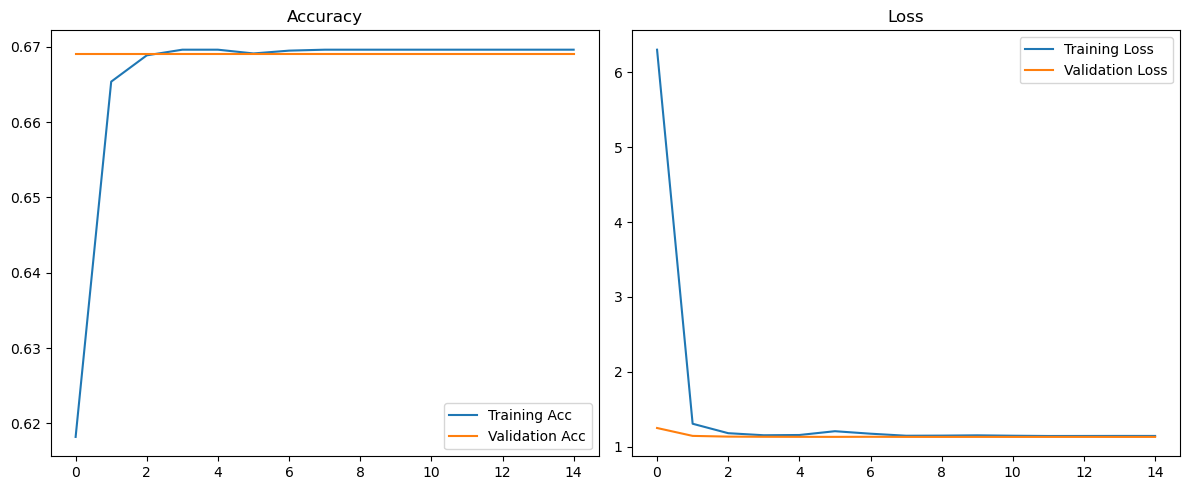

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = r"C:\Users\Dell\Downloads\archive (19)\HAM10000_Categorized"


# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# Load and split dataset using validation_split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Optional: Data augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

# Normalize and prefetch
normalization_layer = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x)), y)).prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(tf.data.AUTOTUNE)

# Build DNN model (not CNN)
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax'),
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=2
)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


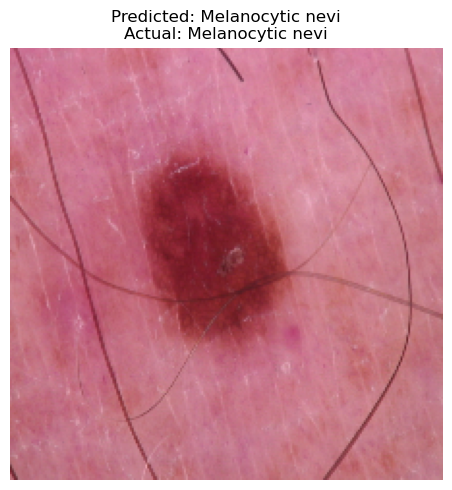

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Class names
class_names = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis',
               'Dermatofibroma', 'Melanocytic nevi', 'Melanoma',
               'Vascular lesions', 'intraepithelial carcinoma']

# Unbatch the validation dataset
unbatched_val_ds = val_ds.unbatch()

# Index of the image you want
target_index = 0

# Get image and label at that index
for i, (img, label) in enumerate(unbatched_val_ds):
    if i == target_index:
        selected_img = img.numpy()       # shape (224, 224, 3), float32 values in 0–1
        selected_label = np.argmax(label.numpy())
        break

# Predict
prediction = model.predict(tf.expand_dims(selected_img, axis=0))
predicted_index = np.argmax(prediction[0])

# 🎯 Plot properly
plt.figure(figsize=(5, 5))
plt.imshow(selected_img)  # Already in 0–1, no need to convert
plt.title(f"Predicted: {class_names[predicted_index]}\nActual: {class_names[selected_label]}")
plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
import joblib
import pickle
pickle_filename='skin disease_model.h5'
with open(pickle_filename,'wb')as file:
     pickle.dump(model, file)

In [11]:
print("Model save to",pickle_filename)

Model save to skin disease_model.h5


In [12]:
model.save("C:/Users/Dell/Downloads/skin_model.h5")


In [15]:
import os
print("Model saved at:", os.path.abspath("skin_model.h5"))


Model saved at: C:\Users\Dell\skin_model.h5


In [17]:
joblib.dump(model,'skin_model.h5')

['skin_model.h5']

In [13]:
import os

model_path = "C:/Users/Dell/Desktop/skin_model.h5" # ← your path
print("File exists?", os.path.exists(model_path))


File exists? True


Found 10015 files belonging to 8 classes.
Using 8012 files for training.
Found 10015 files belonging to 8 classes.
Using 2003 files for validation.
Classes: ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevi', 'Melanoma', 'Vascular lesions', 'all_images']
Class weights: {0: 4.319137466307278, 1: 2.7713593912141126, 2: 1.3110783832433317, 3: 12.860353130016051, 4: 0.2133404340300892, 5: 1.2860353130016051, 6: 9.782661782661783}
Epoch 1/15
251/251 - 314s - 1s/step - accuracy: 0.3989 - loss: 1.7484 - val_accuracy: 0.5182 - val_loss: 1.2242
Epoch 2/15
251/251 - 361s - 1s/step - accuracy: 0.4670 - loss: 1.4600 - val_accuracy: 0.5257 - val_loss: 1.2456
Epoch 3/15
251/251 - 291s - 1s/step - accuracy: 0.4784 - loss: 1.3810 - val_accuracy: 0.5582 - val_loss: 1.1962
Epoch 4/15
251/251 - 296s - 1s/step - accuracy: 0.4899 - loss: 1.3434 - val_accuracy: 0.5342 - val_loss: 1.1923
Epoch 5/15
251/251 - 381s - 2s/step - accuracy: 0.5061 - loss: 1.2677 

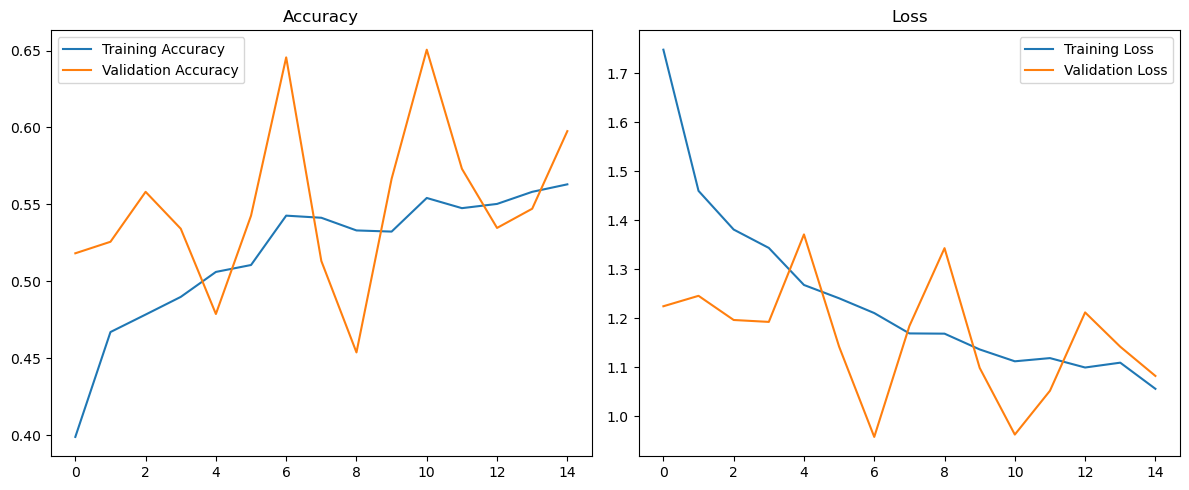

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os


import matplotlib.pyplot as plt

#  Path to dataset
dataset_path = r"C:\Users\Dell\Downloads\archive (19)\HAM10000_Categorized"

#  Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

#  Load data
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

#  Class names
class_names = train_ds.class_names
print("Classes:", class_names)

#  Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

#  Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x)), y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(tf.data.AUTOTUNE)

#  Compute class weights
labels = []
for _, y in train_ds.unbatch():
    labels.append(np.argmax(y.numpy()))
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

#  Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

#  Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

#  Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Callbacks

reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1)


#  Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weight_dict,
     verbose=2
)

#  Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


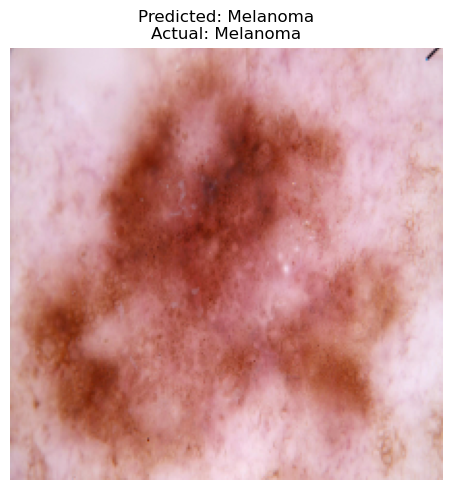

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Class names
class_names = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis',
               'Dermatofibroma', 'Melanocytic nevi', 'Melanoma',
               'Vascular lesions', 'intraepithelial carcinoma']

# Take one batch from the validation dataset
for images, labels in val_ds.take(1):  # just one batch
    # Choose an index within the batch (0 to batch_size-1)
    sample_index = 5 # You can change this index to test a different image

    selected_img = images[sample_index].numpy()       # shape: (224, 224, 3)
    selected_label = np.argmax(labels[sample_index].numpy())  # correct label
    break

# Predict
prediction = model.predict(tf.expand_dims(selected_img, axis=0))
predicted_index = np.argmax(prediction[0])

# 🎯 Plot properly
plt.figure(figsize=(5, 5))
plt.imshow(selected_img)  # Already in 0–1, no need to rescale
plt.title(f"Predicted: {class_names[predicted_index]}\nActual: {class_names[selected_label]}")
plt.axis('off')
plt.tight_layout()
plt.show()


In [47]:
import joblib
import pickle
pickle_filename='skin_disease_model.h5'
with open(pickle_filename,'wb')as file:
     pickle.dump(model, file)

In [49]:
print("Model save to",pickle_filename)

Model save to skin_disease_model.h5


In [51]:
model.save("C:/Users/Dell/Downloads/skin_disease_model.h5")
